In [ ]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
np.random.seed(0)

In [ ]:
## Importando os dados
test = pd.read_csv("/content/drive/MyDrive/titanic/test.csv")
train = pd.read_csv("/content/drive/MyDrive/titanic/train.csv")
## Estatísticas dos dataset
print(test.describe())
print(train.describe())


       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200
       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.8

In [ ]:
## Verificando os tipos de dados das features
train.info()
test.info()
## Verificando features contendo NaN
pd.isnull(train).sum()
pd.isnull(test).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
## Separando features numéricas
numeric_train = train.loc[:, ['PassengerId','Survived','Age', 'SibSp', 'Parch', 'Fare', 'Pclass']]
numeric_test = test.loc[:, ['PassengerId','Age', 'SibSp', 'Parch', 'Fare', 'Pclass']]
## Retirando linhas com NaN em train
numeric_train = numeric_train.dropna(axis = 0)
## Substituindo NaN por 0 em test
numeric_test = numeric_test.fillna(0)
print(numeric_test.shape)
print(numeric_train.shape)

(418, 6)
(714, 7)


In [ ]:
## Criando novo dataframe para separar a feature Age
train_age_split = numeric_train.loc[:,['Survived', 'Age']]

## Separando feature Age por faixa e criando nova feature AgeGroup
bins = np.arange(0,90,10)
labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80']

train_age_split['AgeGroup'] = pd.cut(numeric_train['Age'], bins, labels = labels)
train_age_split.head()

,Survived,Age,AgeGroup
0,0,22.0,20-30
1,1,38.0,30-40
2,1,26.0,20-30
3,1,35.0,30-40
4,0,35.0,30-40


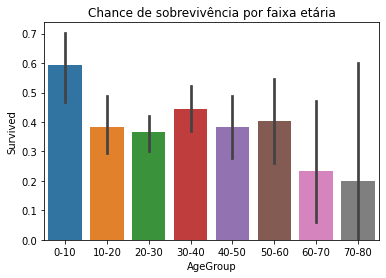

In [ ]:
# Plotando a distribuição de chances de sobrevivencia por faixa etária
plt.title('Chance de sobrevivência por faixa etária')
sns.barplot(x = 'AgeGroup', y = 'Survived', data = train_age_split)

**ANÁLISE DO GRÁFICO**

É possível notar uma maior chance de sobrevivência para o grupo de crianças com menos de 10 anos. Além disso os adultos com mais de 30 anos e menos de 60 anos possuem maior chance de sobreviver quando comparados com criânças e jovens ca faixa dos 10 aos 30 anos. Pode-se notar também uma grande variação nas chances de sobrevivência dos idosos com mais de 60 anos, tornando a análise inconclusiva.

**GRÁFICOS DAS DEMAIS FEATURES**

**SibSp**

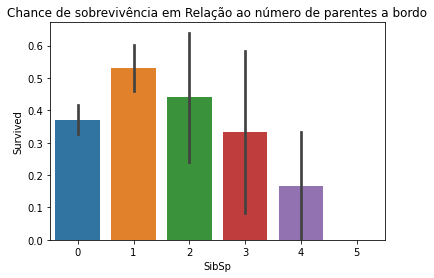

In [ ]:
## Plotando relação Chance de sobrevivência X Nº de parentes a bordo
plt.title('Chance de sobrevivência em Relação ao número de parentes a bordo')
sns.barplot(x = 'SibSp', y = 'Survived', data = numeric_train)

**ANÁLISE DO GRÁFICO**

Os passageiros que possuíam apenas um parente a bordo apresentaram maior chance de sobrevivência. Além disso a chance de sobrevivência diminui a medida que o número de parentes aumenta, exceto de 0 para 1. A chance de sobrevivência nula para passageiros com 5 parentes a bordo pode ser explicada pela pela baixa quantidade de passageiros com esta quantidade de parentes a bordo.

**Pclass**

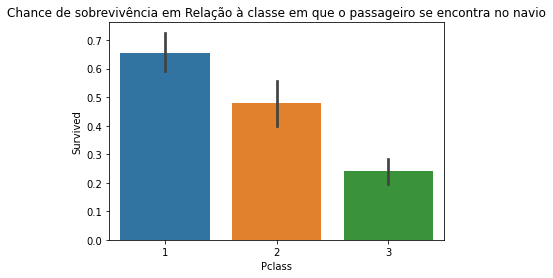

In [ ]:
## Plotando relação Chance de Sobrevivência X Classe do Navio
plt.title('Chance de sobrevivência em Relação à classe em que o passageiro se encontra no navio')
sns.barplot(x = 'Pclass', y = 'Survived', data = numeric_train);

**ANÁLISE DO GRÁFICO**

O gráfico indica que há maior chance de sobrevivência para passageiros pertencentes as classes mais altas do navio.

**Parch**

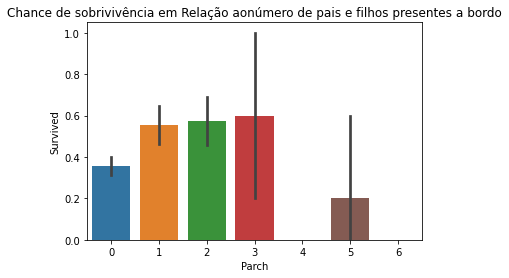

In [ ]:
## Plotando relação Chance de Sobrevivência X Nº de Pais e Filhos
plt.title('Chance de sobrivivência em Relação aonúmero de pais e filhos presentes a bordo')
sns.barplot(x = 'Parch', y = 'Survived', data = numeric_train)

**ANÁLISE DO GRÁFICO**

Pelo gráfico pode-se notar uma maior chance de sobrevivência para os passageiros com pelo menos um 1 e com menos de 3 filhos possuem maior chance de sobrevivência. 

In [ ]:
## Treinamento do modelo e submissão das predições
# Filtrando features para treinamento e definindo target
X = numeric_train.drop(['PassengerId','Survived'], axis = 1)
y = numeric_train['Survived']

#Separando o banco de dados de treino e validação, validação será 20% do tamanho de treino
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Treinando o modelo
random_forest = RandomForestClassifier()
random_forest.fit(train_X, train_y)
preds = random_forest.predict(val_X)

#Validando o modelo
accurance = round(accuracy_score(preds,val_y)*100,2)
print(accurance)

67.13


**Avaliação do Modelo**

O modelo teve uma taxa de acerto de 67,13% , portanto apresentou baixa precisão em suas predições.

In [ ]:
#Produzindo as predições
index = numeric_test['PassengerId']
prediction = random_forest.predict(numeric_test.drop('PassengerId', axis = 1))

#Produzindo o arquivo com as predições
output = pd.DataFrame({'PassengerId':index, 'Survived': prediction})
output.to_csv('submission.csv', index = False)

**Machine Learning Clássico - Data Cleaning**

In [ ]:
## Colunas dos bancos de dados teste e treino
test_columns = test.columns
train_columns = train.columns
print(test_columns)
print()
print(train_columns)
print()
## Analisando yipos de dado nas colunas dos dataframes
print(test.info())
print()
print(train.info())


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage:

In [ ]:
## Contando os valores NaN nas features
test_null = test.isnull().sum()
train_null = train.isnull().sum()
print(test_null)
print('*'*19)
print(train_null)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
*******************
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
## Fazendo copiaa do bancos de dados de treino
train_copy = train.copy()
## Retirando features 'Cabin' e 'Ticket'
for data in [train_copy, test]:
  data = data.drop(['Cabin', 'Ticket'], axis=1, inplace= True)

In [ ]:
for data in [train_copy, test]:
  ## Substituindo valores nulos pela mediana nas features "Age" e "Fare"
  data['Age'].fillna(data['Age'].median(), inplace=True)
  data['Fare'].fillna(data['Fare'].median(), inplace=True)
  ## Substituindo valores nulos pela moda na feature "Embarked"
  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [ ]:
for data in [train_copy, test]:
  ## Separando feature "Age" em 5 intervalos de mesmo tamanho
  data['AgeGroup'] = pd.cut(data['Age'].astype(int),5)
  ## Separando feature "Fare" em 6 intervalos com mesmo numero de dados
  data['FareGroup'] = pd.qcut(data['Fare'], 6)

**Aperfeiçoamento da Modelagem**

In [ ]:
# Relembrando Features Categóricas
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Fare         891 non-null    float64 
 9   Embarked     891 non-null    object  
 10  AgeGroup     891 non-null    category
 11  FareGroup    891 non-null    category
dtypes: category(2), float64(2), int64(5), object(3)
memory usage: 72.0+ KB


In [ ]:
## Identificando nome das colunas numéricas e categóricas
numeric_features = train_copy.select_dtypes(include=['int64', 'float64']).columns
categoric_features = train_copy.select_dtypes(include=['object']).columns
for data in [numeric_features, categoric_features]:
  print(data)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Index(['Name', 'Sex', 'Embarked'], dtype='object')


**Encoding de Variáveis Categóricas**

In [ ]:
## One-Hot-encode
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse = False)
## Função para realizar o encoding das variáveis
def onehotEncode(data,cols):
    encode_data = data.copy()
    for col in cols:      
        ## Criando colunas para atribuir One-hot-encode
        onehotCols = pd.DataFrame(onehot.fit_transform(data[[col]]),dtype = 'int')
        ## Nomeando as colunas
        onehotCols.columns = onehot.get_feature_names([col])
        ## Adicionando as novas colunas codificadas ao dataframe
        encode_data = encode_data.drop([col], axis = 1)
        encode_data = pd.concat([encode_data,onehotCols], axis = 1)
    return encode_data

#Realizando o encoding dos dataframes
train_encoded = onehotEncode(train_copy,["Sex","Embarked"])
test_encoded = onehotEncode(test,["Sex","Embarked"])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is d

In [ ]:
## Label encoding
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for data in [train_encoded,test_encoded]:
    data["Age_group_code"] = label.fit_transform(data["AgeGroup"])
    data["Fare_group_code"] = label.fit_transform(data["FareGroup"])
    data = data.drop(["AgeGroup","FareGroup","Name"], axis = 1, inplace = True)
    
train_encoded.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_group_code,Fare_group_code
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1,1,0
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0,2,5
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1,1,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1,2,5
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1,2,1


In [ ]:
## Criando e avaliando novo modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

randomforest_model1 = RandomForestClassifier(random_state = 0)
# Filtrando features para treinamento e definindo target
X_model1 = train_encoded.drop('Survived', axis = 1)
y_model1 = train_encoded['Survived']
#Separando o banco de dados de treino e validação, validação será 20% do tamanho de treino
X_train,X_valid,y_train,y_valid = train_test_split(X_model1,y_model1,test_size = 0.2,random_state = 0)
# Treinando o modelo
randomforest_model1.fit(X_train,y_train)
preds = randomforest_model1.predict(X_valid)
#Validando o modelo
accuracy = round(accuracy_score(preds,y_valid)*100,2)
print(accuracy)

83.24


**Pipelines**

In [ ]:
## Colocando de volta os valores nulos das colunas “Age” e “Embarked”
train_copy2 = train_copy.copy()
train_copy2 = train_copy2.drop(["Age","Embarked"], axis = 1)
train_copy2 = pd.concat([train_copy2,train[["Age","Embarked"]]],axis = 1)
train_copy2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
AgeGroup         0
FareGroup        0
Age            177
Embarked         2
dtype: int64

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
## Criando função que produz e avalia pipelines
def pipeline_maker(data, encoder, model, numerical_imputer = SimpleImputer(),categorical_imputer = SimpleImputer(strategy = 'most_frequent')):
  ## Definindo as features e o target que serão usados
  X_pipe = data.drop('Survived', axis = 1)
  y_pipe = data['Survived']
  ## Separarando o banco de dados utilizando o train-test split
  X_train_pipe,X_valid_pipe,y_train_pipe,y_valid_pipe = train_test_split(X_pipe,y_pipe,test_size = 0.2,random_state = 0)

  ## Criando preprocessor
  num_transf = numerical_imputer
  cat_transf = Pipeline(steps = [('imputer', categorical_imputer),('encoder',encoder)])
  preprocessor = ColumnTransformer(transformers = [('num',num_transf,['Age']),('cat',cat_transf,['AgeGroup','FareGroup','Sex','Embarked'])])
  
  ## Criando pipeline utilizando o preprocessor previamente construído
  pipe = Pipeline(steps = [('preprocessor', preprocessor),('model', model)])
  ## Treinando pipeline
  pipe.fit(X_train_pipe,y_train_pipe)
  ## Gerando predições
  preds_pipe = pipe.predict(X_valid_pipe)

  ## Avaliando as predições
  accuracy = round(accuracy_score(preds_pipe,y_valid_pipe)*100,2)
  return accuracy, preds_pipe

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
## Definindo as estrategias para imputing
mean_imputer = SimpleImputer()
most_frequent_imputer = SimpleImputer(strategy = 'most_frequent')
median_imputer = SimpleImputer(strategy = 'median')
zero_imputer = SimpleImputer(strategy = 'constant', fill_value = 0)
imputers = [mean_imputer, most_frequent_imputer, median_imputer, zero_imputer]

## Definindo as estrategias para encoding
onehot_encoder = OneHotEncoder(sparse = False)
ordinal_encoder = OrdinalEncoder()
encoders = [onehot_encoder, ordinal_encoder]

## Definindo Modelo
randomforest = RandomForestClassifier(random_state = 0)

## Criando loop que produz todas as combinações de estratégia possíveis
for encoder in encoders:
    for imputer in imputers:
        accuracy,_ = pipeline_maker(train_copy2, encoder, randomforest, numerical_imputer = imputer)
        print("pipe_"+str(encoder)+'_'+str(imputer)+'='+str(accuracy))

pipe_OneHotEncoder(sparse=False)_SimpleImputer()=78.21
pipe_OneHotEncoder(sparse=False)_SimpleImputer(strategy='most_frequent')=77.65
pipe_OneHotEncoder(sparse=False)_SimpleImputer(strategy='median')=76.54
pipe_OneHotEncoder(sparse=False)_SimpleImputer(fill_value=0, strategy='constant')=77.09
pipe_OrdinalEncoder()_SimpleImputer()=78.21
pipe_OrdinalEncoder()_SimpleImputer(strategy='most_frequent')=78.21
pipe_OrdinalEncoder()_SimpleImputer(strategy='median')=77.09
pipe_OrdinalEncoder()_SimpleImputer(fill_value=0, strategy='constant')=78.77


Note que nenhuma dessas estratégias usadas separadamente, gerou uma precisão do
modelo maior que suas utilizações mescladas.

**Cross Validation e Gradient Boosting**

In [ ]:
## Avaliando modelo com cross validation
from sklearn.model_selection import cross_val_score
## Criando função para gerar avaliação
def crossValidation(model, X, y):
    scores = cross_val_score(model, X, y, cv = 5, scoring = 'accuracy')
    return round(scores.mean()*100,2)

## Avaliando modelo mesclado 
cv_accuracy = crossValidation(randomforest_model1, X_model1, y_model1)
print(cv_accuracy)

80.93


In [ ]:
## Avaliando modelo com gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
## Criando função para gerar avaliação 
def gradientBoosting(X,y):
    gradientBoosting_class = GradientBoostingClassifier(random_state = 0, n_iter_no_change = 100) 
    gradientBoosting_class.fit(X,y)
    score = crossValidation(gradientBoosting_class, X, y)
    return score, gradientBoosting_class

X_model2 = X_model1
y_model2 = y_model1

score,gradientBoosting_class = gradientBoosting(X_model2,y_model2)
print(score)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingClassi

78.47
